In [2]:
import torch
from torchvision import transforms, datasets
BATCH_SIZE = 64

trainset = datasets.FashionMNIST(
    root = '../data/FASHIONMNIST',
    train = True,
    download = True,
    transform = transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    dataset = trainset,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = 2
)

Extracting ../data/FASHIONMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FASHIONMNIST/FashionMNIST/raw


Extracting ../data/FASHIONMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FASHIONMNIST/FashionMNIST/raw


Extracting ../data/FASHIONMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FASHIONMNIST/FashionMNIST/raw


Extracting ../data/FASHIONMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FASHIONMNIST/FashionMNIST/raw
Processing...



Done!


In [3]:
from torch import nn, optim

class AE(nn.Module):
  def __init__(self):
    super(AE, self).__init__()

    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
    )

    self.decoder = nn.Sequential(
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 28*28),
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu')

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.MSELoss()

print('Model:', model)
print('Device:', DEVICE)

Model: AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
  )
)
Device: cpu


In [0]:
view_data = trainset.data[:5].view(-1, 28 * 28)
view_data = view_data.type(torch.FloatTensor) / 255.

In [0]:
def train(model, train_loader, optimizer):
  model.train()
  for step, (x, label) in enumerate(train_loader):
    x = x.view(-1, 28 * 28).to(DEVICE)
    y = x.view(-1, 28 * 28).to(DEVICE)
    label = label.to(DEVICE)

    encoded, decoded = model(x)
    loss = criterion(decoded, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 100 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss:{:.6f}'.format(
          epoch, step * len(x), len(train_loader.dataset), 100. * step / len(train_loader), loss.item()
      ))

Train Epoch: 1 [0/60000 (0%)]	Loss:0.212203
Train Epoch: 1 [6400/60000 (11%)]	Loss:0.027989
Train Epoch: 1 [12800/60000 (21%)]	Loss:0.021745
Train Epoch: 1 [19200/60000 (32%)]	Loss:0.019182
Train Epoch: 1 [25600/60000 (43%)]	Loss:0.019074
Train Epoch: 1 [32000/60000 (53%)]	Loss:0.016382
Train Epoch: 1 [38400/60000 (64%)]	Loss:0.016463
Train Epoch: 1 [44800/60000 (75%)]	Loss:0.014561
Train Epoch: 1 [51200/60000 (85%)]	Loss:0.014749
Train Epoch: 1 [57600/60000 (96%)]	Loss:0.015052
[Epoch 1]


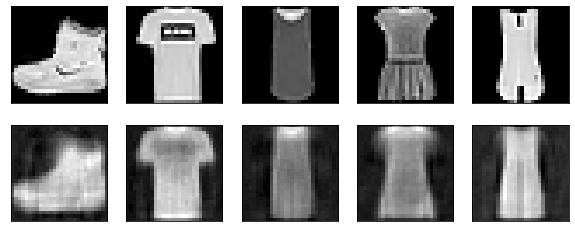

Train Epoch: 2 [0/60000 (0%)]	Loss:0.015938
Train Epoch: 2 [6400/60000 (11%)]	Loss:0.015239
Train Epoch: 2 [12800/60000 (21%)]	Loss:0.015413
Train Epoch: 2 [19200/60000 (32%)]	Loss:0.013391
Train Epoch: 2 [25600/60000 (43%)]	Loss:0.012794
Train Epoch: 2 [32000/60000 (53%)]	Loss:0.012168
Train Epoch: 2 [38400/60000 (64%)]	Loss:0.013621
Train Epoch: 2 [44800/60000 (75%)]	Loss:0.013189
Train Epoch: 2 [51200/60000 (85%)]	Loss:0.015600
Train Epoch: 2 [57600/60000 (96%)]	Loss:0.014926
[Epoch 2]


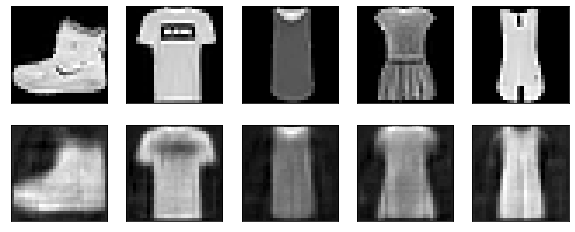

Train Epoch: 3 [0/60000 (0%)]	Loss:0.013853
Train Epoch: 3 [6400/60000 (11%)]	Loss:0.015200
Train Epoch: 3 [12800/60000 (21%)]	Loss:0.014869
Train Epoch: 3 [19200/60000 (32%)]	Loss:0.013503
Train Epoch: 3 [25600/60000 (43%)]	Loss:0.014002
Train Epoch: 3 [32000/60000 (53%)]	Loss:0.011466
Train Epoch: 3 [38400/60000 (64%)]	Loss:0.013639
Train Epoch: 3 [44800/60000 (75%)]	Loss:0.014576
Train Epoch: 3 [51200/60000 (85%)]	Loss:0.014296
Train Epoch: 3 [57600/60000 (96%)]	Loss:0.014007
[Epoch 3]


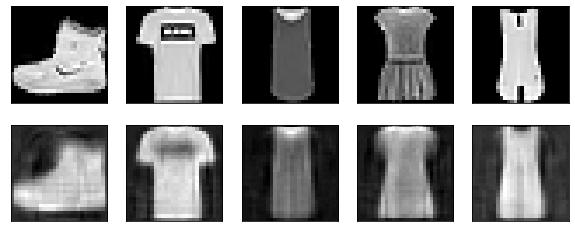

Train Epoch: 4 [0/60000 (0%)]	Loss:0.014065
Train Epoch: 4 [6400/60000 (11%)]	Loss:0.012999
Train Epoch: 4 [12800/60000 (21%)]	Loss:0.014355
Train Epoch: 4 [19200/60000 (32%)]	Loss:0.011528
Train Epoch: 4 [25600/60000 (43%)]	Loss:0.014033
Train Epoch: 4 [32000/60000 (53%)]	Loss:0.014239
Train Epoch: 4 [38400/60000 (64%)]	Loss:0.011805
Train Epoch: 4 [44800/60000 (75%)]	Loss:0.013725
Train Epoch: 4 [51200/60000 (85%)]	Loss:0.012640
Train Epoch: 4 [57600/60000 (96%)]	Loss:0.013616
[Epoch 4]


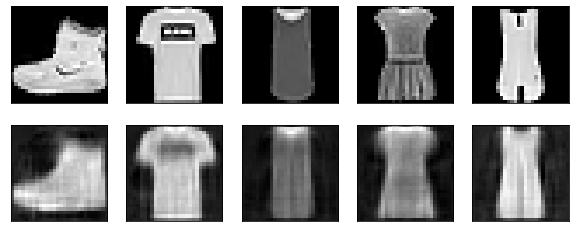

Train Epoch: 5 [0/60000 (0%)]	Loss:0.010536
Train Epoch: 5 [6400/60000 (11%)]	Loss:0.012494
Train Epoch: 5 [12800/60000 (21%)]	Loss:0.013427
Train Epoch: 5 [19200/60000 (32%)]	Loss:0.011857
Train Epoch: 5 [25600/60000 (43%)]	Loss:0.013547
Train Epoch: 5 [32000/60000 (53%)]	Loss:0.013730
Train Epoch: 5 [38400/60000 (64%)]	Loss:0.012192
Train Epoch: 5 [44800/60000 (75%)]	Loss:0.013599
Train Epoch: 5 [51200/60000 (85%)]	Loss:0.011845
Train Epoch: 5 [57600/60000 (96%)]	Loss:0.011939
[Epoch 5]


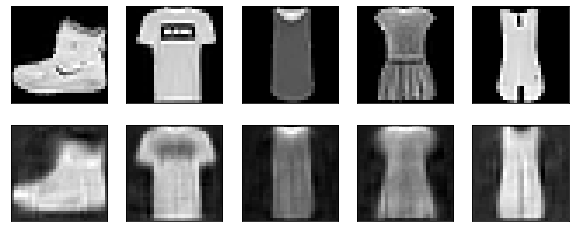

Train Epoch: 6 [0/60000 (0%)]	Loss:0.011075
Train Epoch: 6 [6400/60000 (11%)]	Loss:0.013875
Train Epoch: 6 [12800/60000 (21%)]	Loss:0.013396
Train Epoch: 6 [19200/60000 (32%)]	Loss:0.011745
Train Epoch: 6 [25600/60000 (43%)]	Loss:0.013278
Train Epoch: 6 [32000/60000 (53%)]	Loss:0.013006
Train Epoch: 6 [38400/60000 (64%)]	Loss:0.012320
Train Epoch: 6 [44800/60000 (75%)]	Loss:0.011732
Train Epoch: 6 [51200/60000 (85%)]	Loss:0.012364
Train Epoch: 6 [57600/60000 (96%)]	Loss:0.013823
[Epoch 6]


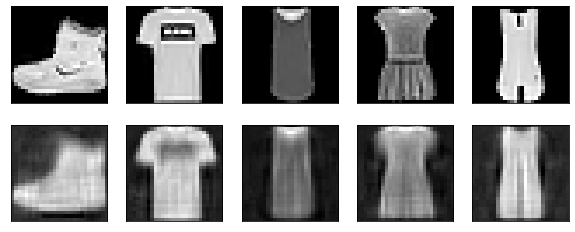

Train Epoch: 7 [0/60000 (0%)]	Loss:0.013203
Train Epoch: 7 [6400/60000 (11%)]	Loss:0.012502
Train Epoch: 7 [12800/60000 (21%)]	Loss:0.011589
Train Epoch: 7 [19200/60000 (32%)]	Loss:0.013629
Train Epoch: 7 [25600/60000 (43%)]	Loss:0.011358
Train Epoch: 7 [32000/60000 (53%)]	Loss:0.012627
Train Epoch: 7 [38400/60000 (64%)]	Loss:0.012337
Train Epoch: 7 [44800/60000 (75%)]	Loss:0.013049
Train Epoch: 7 [51200/60000 (85%)]	Loss:0.012203
Train Epoch: 7 [57600/60000 (96%)]	Loss:0.011336
[Epoch 7]


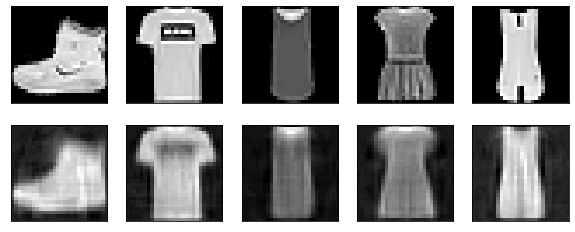

Train Epoch: 8 [0/60000 (0%)]	Loss:0.012541
Train Epoch: 8 [6400/60000 (11%)]	Loss:0.012001
Train Epoch: 8 [12800/60000 (21%)]	Loss:0.012090
Train Epoch: 8 [19200/60000 (32%)]	Loss:0.013901
Train Epoch: 8 [25600/60000 (43%)]	Loss:0.012533
Train Epoch: 8 [32000/60000 (53%)]	Loss:0.013451
Train Epoch: 8 [38400/60000 (64%)]	Loss:0.009662
Train Epoch: 8 [44800/60000 (75%)]	Loss:0.012638
Train Epoch: 8 [51200/60000 (85%)]	Loss:0.012106
Train Epoch: 8 [57600/60000 (96%)]	Loss:0.011634
[Epoch 8]


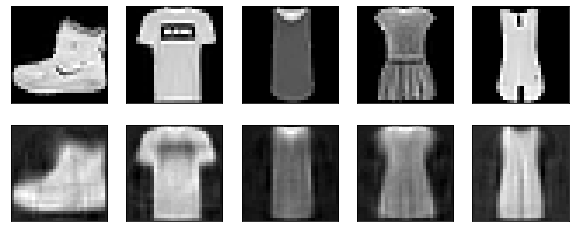

Train Epoch: 9 [0/60000 (0%)]	Loss:0.010476
Train Epoch: 9 [6400/60000 (11%)]	Loss:0.010294
Train Epoch: 9 [12800/60000 (21%)]	Loss:0.013461
Train Epoch: 9 [19200/60000 (32%)]	Loss:0.011958
Train Epoch: 9 [25600/60000 (43%)]	Loss:0.013660
Train Epoch: 9 [32000/60000 (53%)]	Loss:0.012018
Train Epoch: 9 [38400/60000 (64%)]	Loss:0.013757
Train Epoch: 9 [44800/60000 (75%)]	Loss:0.012144
Train Epoch: 9 [51200/60000 (85%)]	Loss:0.012083
Train Epoch: 9 [57600/60000 (96%)]	Loss:0.011219
[Epoch 9]


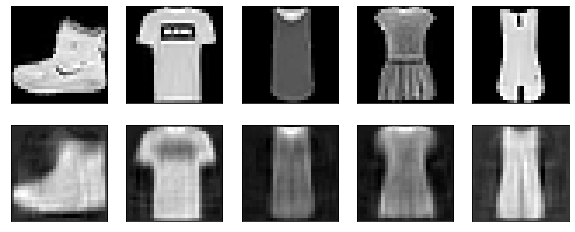

Train Epoch: 10 [0/60000 (0%)]	Loss:0.012221
Train Epoch: 10 [6400/60000 (11%)]	Loss:0.012483
Train Epoch: 10 [12800/60000 (21%)]	Loss:0.011272
Train Epoch: 10 [19200/60000 (32%)]	Loss:0.012388
Train Epoch: 10 [25600/60000 (43%)]	Loss:0.012025
Train Epoch: 10 [32000/60000 (53%)]	Loss:0.012025
Train Epoch: 10 [38400/60000 (64%)]	Loss:0.011840
Train Epoch: 10 [44800/60000 (75%)]	Loss:0.011082
Train Epoch: 10 [51200/60000 (85%)]	Loss:0.011952
Train Epoch: 10 [57600/60000 (96%)]	Loss:0.013419
[Epoch 10]


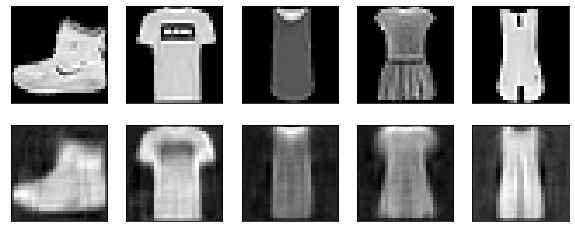

In [7]:
import numpy as np
import matplotlib.pyplot as plt

EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer)
  test_x = view_data.to(DEVICE)
  encoded_data, decoded_data = model(test_x)
  f, a = plt.subplots(2, 5, figsize=(10, 4))
  print('[Epoch {}]'.format(epoch))
  for idx in range(5):
    img = np.reshape(view_data.data.numpy()[idx], (28, 28))
    a[0][idx].imshow(img, cmap='gray')
    a[0][idx].set_xticks(())
    a[0][idx].set_yticks(())
    
  for idx in range(5):
    img = np.reshape(decoded_data.to('cpu').data.numpy()[idx], (28, 28))
    a[1][idx].imshow(img, cmap='gray')
    a[1][idx].set_xticks(())
    a[1][idx].set_yticks(())
  plt.show()

model: AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=128, out_features=784, bias=True)
  )
)
device: cpu
Train Epoch: 1 [0/60000 (0%)]	Loss:0.306179
Train Epoch: 1 [6400/60000 (11%)]	Loss:0.038405
Train Epoch: 1 [12800/60000 (21%)]	Loss:0.038252
Train Epoch: 1 [19200/60000 (32%)]	Loss:0.033260
Train Epoch: 1 [25600/60000 (43%)]	Loss:0.026753
Train Epoch: 1 [32000/60000 (53%)]	Loss:0.026641
Train Epoch: 1 [38400/60000 (64%)]	Loss:0.025152
Train Epoch: 1 [44800/60000 (75%)]	Loss:0.021621
Train Epoch: 1 [51200/60000 (85%)]	Loss:0.022954
Train Epoch: 1 [57600/60000 (96%)]	Loss:0.018547
[Epoch 1]


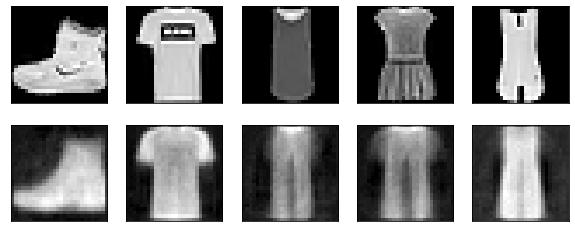

Train Epoch: 2 [0/60000 (0%)]	Loss:0.024022
Train Epoch: 2 [6400/60000 (11%)]	Loss:0.018129
Train Epoch: 2 [12800/60000 (21%)]	Loss:0.021321
Train Epoch: 2 [19200/60000 (32%)]	Loss:0.019029
Train Epoch: 2 [25600/60000 (43%)]	Loss:0.018196
Train Epoch: 2 [32000/60000 (53%)]	Loss:0.018492
Train Epoch: 2 [38400/60000 (64%)]	Loss:0.018728
Train Epoch: 2 [44800/60000 (75%)]	Loss:0.016624
Train Epoch: 2 [51200/60000 (85%)]	Loss:0.016546
Train Epoch: 2 [57600/60000 (96%)]	Loss:0.016419
[Epoch 2]


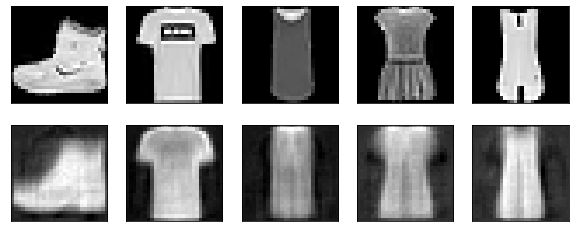

Train Epoch: 3 [0/60000 (0%)]	Loss:0.016784
Train Epoch: 3 [6400/60000 (11%)]	Loss:0.015958
Train Epoch: 3 [12800/60000 (21%)]	Loss:0.019113
Train Epoch: 3 [19200/60000 (32%)]	Loss:0.018356
Train Epoch: 3 [25600/60000 (43%)]	Loss:0.015755
Train Epoch: 3 [32000/60000 (53%)]	Loss:0.017698
Train Epoch: 3 [38400/60000 (64%)]	Loss:0.014370
Train Epoch: 3 [44800/60000 (75%)]	Loss:0.014698
Train Epoch: 3 [51200/60000 (85%)]	Loss:0.013992
Train Epoch: 3 [57600/60000 (96%)]	Loss:0.014293
[Epoch 3]


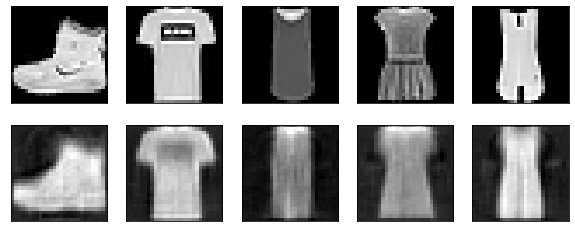

Train Epoch: 4 [0/60000 (0%)]	Loss:0.015028
Train Epoch: 4 [6400/60000 (11%)]	Loss:0.013487
Train Epoch: 4 [12800/60000 (21%)]	Loss:0.014113
Train Epoch: 4 [19200/60000 (32%)]	Loss:0.013751
Train Epoch: 4 [25600/60000 (43%)]	Loss:0.014930
Train Epoch: 4 [32000/60000 (53%)]	Loss:0.012693
Train Epoch: 4 [38400/60000 (64%)]	Loss:0.014811
Train Epoch: 4 [44800/60000 (75%)]	Loss:0.015167
Train Epoch: 4 [51200/60000 (85%)]	Loss:0.014956
Train Epoch: 4 [57600/60000 (96%)]	Loss:0.012456
[Epoch 4]


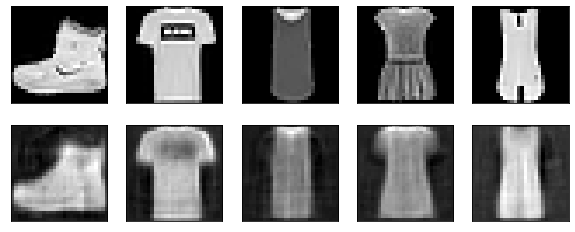

Train Epoch: 5 [0/60000 (0%)]	Loss:0.013474
Train Epoch: 5 [6400/60000 (11%)]	Loss:0.015433
Train Epoch: 5 [12800/60000 (21%)]	Loss:0.013366
Train Epoch: 5 [19200/60000 (32%)]	Loss:0.014676
Train Epoch: 5 [25600/60000 (43%)]	Loss:0.012829
Train Epoch: 5 [32000/60000 (53%)]	Loss:0.011112
Train Epoch: 5 [38400/60000 (64%)]	Loss:0.013485
Train Epoch: 5 [44800/60000 (75%)]	Loss:0.013529
Train Epoch: 5 [51200/60000 (85%)]	Loss:0.013548
Train Epoch: 5 [57600/60000 (96%)]	Loss:0.013768
[Epoch 5]


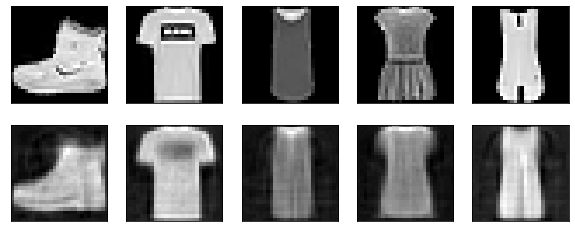

Train Epoch: 6 [0/60000 (0%)]	Loss:0.013321
Train Epoch: 6 [6400/60000 (11%)]	Loss:0.012382
Train Epoch: 6 [12800/60000 (21%)]	Loss:0.012373
Train Epoch: 6 [19200/60000 (32%)]	Loss:0.013447
Train Epoch: 6 [25600/60000 (43%)]	Loss:0.013162
Train Epoch: 6 [32000/60000 (53%)]	Loss:0.012149
Train Epoch: 6 [38400/60000 (64%)]	Loss:0.011517
Train Epoch: 6 [44800/60000 (75%)]	Loss:0.010455
Train Epoch: 6 [51200/60000 (85%)]	Loss:0.011139
Train Epoch: 6 [57600/60000 (96%)]	Loss:0.010812
[Epoch 6]


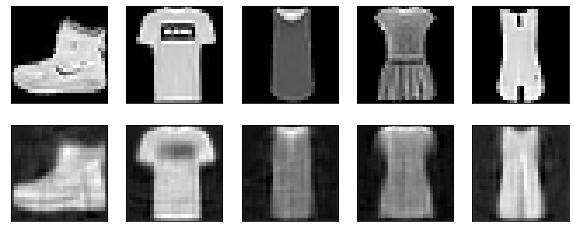

Train Epoch: 7 [0/60000 (0%)]	Loss:0.012552
Train Epoch: 7 [6400/60000 (11%)]	Loss:0.012757
Train Epoch: 7 [12800/60000 (21%)]	Loss:0.011715
Train Epoch: 7 [19200/60000 (32%)]	Loss:0.010892
Train Epoch: 7 [25600/60000 (43%)]	Loss:0.011298
Train Epoch: 7 [32000/60000 (53%)]	Loss:0.011535
Train Epoch: 7 [38400/60000 (64%)]	Loss:0.011550
Train Epoch: 7 [44800/60000 (75%)]	Loss:0.013762
Train Epoch: 7 [51200/60000 (85%)]	Loss:0.011432
Train Epoch: 7 [57600/60000 (96%)]	Loss:0.011193
[Epoch 7]


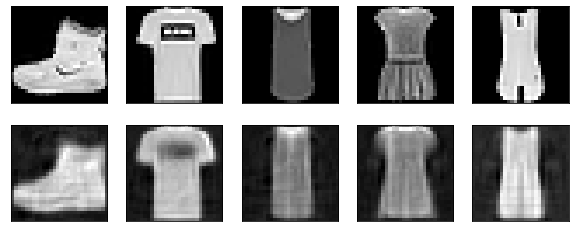

Train Epoch: 8 [0/60000 (0%)]	Loss:0.012033
Train Epoch: 8 [6400/60000 (11%)]	Loss:0.011070
Train Epoch: 8 [12800/60000 (21%)]	Loss:0.012023
Train Epoch: 8 [19200/60000 (32%)]	Loss:0.011019
Train Epoch: 8 [25600/60000 (43%)]	Loss:0.011535
Train Epoch: 8 [32000/60000 (53%)]	Loss:0.010929
Train Epoch: 8 [38400/60000 (64%)]	Loss:0.011118
Train Epoch: 8 [44800/60000 (75%)]	Loss:0.013692
Train Epoch: 8 [51200/60000 (85%)]	Loss:0.010656
Train Epoch: 8 [57600/60000 (96%)]	Loss:0.009854
[Epoch 8]


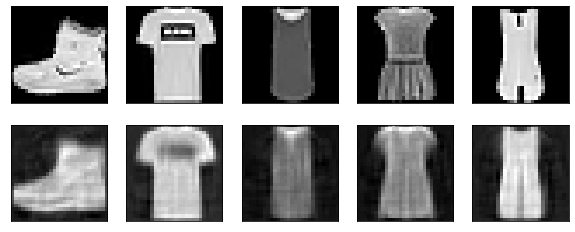

Train Epoch: 9 [0/60000 (0%)]	Loss:0.011300
Train Epoch: 9 [6400/60000 (11%)]	Loss:0.010720
Train Epoch: 9 [12800/60000 (21%)]	Loss:0.010929
Train Epoch: 9 [19200/60000 (32%)]	Loss:0.010304
Train Epoch: 9 [25600/60000 (43%)]	Loss:0.009808
Train Epoch: 9 [32000/60000 (53%)]	Loss:0.009664
Train Epoch: 9 [38400/60000 (64%)]	Loss:0.011369
Train Epoch: 9 [44800/60000 (75%)]	Loss:0.009517
Train Epoch: 9 [51200/60000 (85%)]	Loss:0.011945
Train Epoch: 9 [57600/60000 (96%)]	Loss:0.009290
[Epoch 9]


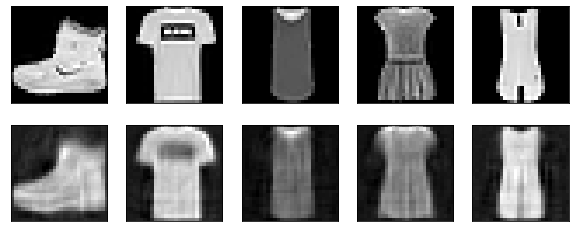

Train Epoch: 10 [0/60000 (0%)]	Loss:0.011319
Train Epoch: 10 [6400/60000 (11%)]	Loss:0.011974
Train Epoch: 10 [12800/60000 (21%)]	Loss:0.012998
Train Epoch: 10 [19200/60000 (32%)]	Loss:0.009691
Train Epoch: 10 [25600/60000 (43%)]	Loss:0.010768
Train Epoch: 10 [32000/60000 (53%)]	Loss:0.012349
Train Epoch: 10 [38400/60000 (64%)]	Loss:0.012193
Train Epoch: 10 [44800/60000 (75%)]	Loss:0.010171
Train Epoch: 10 [51200/60000 (85%)]	Loss:0.010311
Train Epoch: 10 [57600/60000 (96%)]	Loss:0.009210
[Epoch 10]


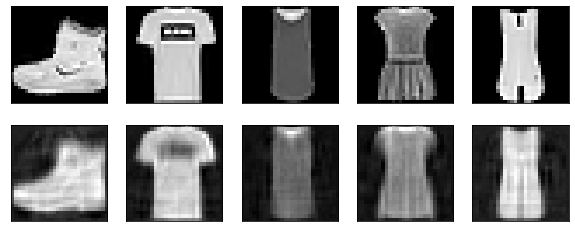

In [12]:
class AE(nn.Module):
  def __init__(self):
    super(AE, self).__init__()

    self.encoder = nn.Sequential(
        nn.Linear(28 * 28, 128),
        nn.Sigmoid(),
        nn.Linear(128, 64),
    )

    self.decoder = nn.Sequential(
        nn.Linear(64, 128),
        nn.Sigmoid(),
        nn.Linear(128, 28 * 28),
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu')

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.MSELoss()

print('model:', model)
print('device:', DEVICE)

EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer)
  test_x = view_data.to(DEVICE)
  encoded_data, decoded_data = model(test_x)
  f, a = plt.subplots(2, 5, figsize = (10, 4))
  print('[Epoch {}]'.format(epoch))
  for idx in range(5):
    img = np.reshape(view_data.data.numpy()[idx], (28, 28))
    a[0][idx].imshow(img, cmap='gray')
    a[0][idx].set_xticks(())
    a[0][idx].set_yticks(())

  for idx in range(5):
    img = np.reshape(decoded_data.to('cpu').data.numpy()[idx], (28, 28))
    a[1][idx].imshow(img, cmap = 'gray')
    a[1][idx].set_xticks(())
    a[1][idx].set_yticks(())
  plt.show()

model: AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=784, bias=True)
  )
)
device: cpu
Train Epoch: 1 [0/60000 (0%)]	Loss:0.227599
Train Epoch: 1 [6400/60000 (11%)]	Loss:0.025356
Train Epoch: 1 [12800/60000 (21%)]	Loss:0.022138
Train Epoch: 1 [19200/60000 (32%)]	Loss:0.021505
Train Epoch: 1 [25600/60000 (43%)]	Loss:0.018761
Train Epoch: 1 [32000/60000 (53%)]	Loss:0.017970
Train Epoch: 1 [38400/60000 (64%)]	Loss:0.014542
Train Epoch: 1 [44800/60000 (75%)]	Loss:0.016862
Train Epoch: 1 [51200/60000 (85%)]	Loss:0.014172
Train Epoch: 1 [57600/60000 (96%)]	Loss:0.017129
[Epoch 1]


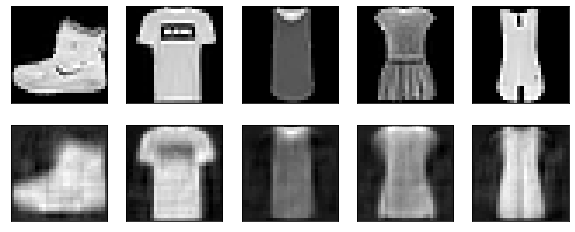

Train Epoch: 2 [0/60000 (0%)]	Loss:0.015909
Train Epoch: 2 [6400/60000 (11%)]	Loss:0.015014
Train Epoch: 2 [12800/60000 (21%)]	Loss:0.081257
Train Epoch: 2 [19200/60000 (32%)]	Loss:0.022873
Train Epoch: 2 [25600/60000 (43%)]	Loss:0.017293
Train Epoch: 2 [32000/60000 (53%)]	Loss:0.016974
Train Epoch: 2 [38400/60000 (64%)]	Loss:0.016700
Train Epoch: 2 [44800/60000 (75%)]	Loss:0.014852
Train Epoch: 2 [51200/60000 (85%)]	Loss:0.014128
Train Epoch: 2 [57600/60000 (96%)]	Loss:0.014787
[Epoch 2]


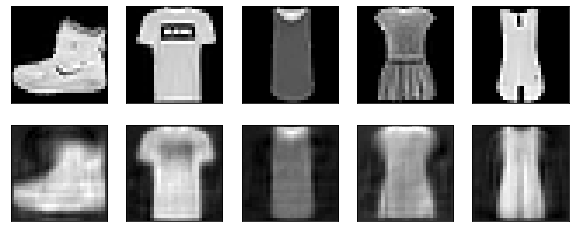

Train Epoch: 3 [0/60000 (0%)]	Loss:0.013842
Train Epoch: 3 [6400/60000 (11%)]	Loss:0.014243
Train Epoch: 3 [12800/60000 (21%)]	Loss:0.014112
Train Epoch: 3 [19200/60000 (32%)]	Loss:0.013028
Train Epoch: 3 [25600/60000 (43%)]	Loss:0.013987
Train Epoch: 3 [32000/60000 (53%)]	Loss:0.014712
Train Epoch: 3 [38400/60000 (64%)]	Loss:0.012312
Train Epoch: 3 [44800/60000 (75%)]	Loss:0.011767
Train Epoch: 3 [51200/60000 (85%)]	Loss:0.015484
Train Epoch: 3 [57600/60000 (96%)]	Loss:0.012836
[Epoch 3]


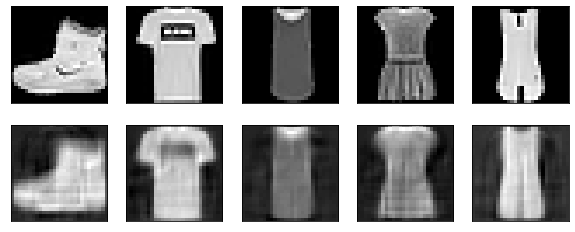

Train Epoch: 4 [0/60000 (0%)]	Loss:0.011965
Train Epoch: 4 [6400/60000 (11%)]	Loss:0.013001
Train Epoch: 4 [12800/60000 (21%)]	Loss:0.014059
Train Epoch: 4 [19200/60000 (32%)]	Loss:0.014304
Train Epoch: 4 [25600/60000 (43%)]	Loss:0.016581
Train Epoch: 4 [32000/60000 (53%)]	Loss:0.013694
Train Epoch: 4 [38400/60000 (64%)]	Loss:0.011256
Train Epoch: 4 [44800/60000 (75%)]	Loss:0.013248
Train Epoch: 4 [51200/60000 (85%)]	Loss:0.012819
Train Epoch: 4 [57600/60000 (96%)]	Loss:0.011866
[Epoch 4]


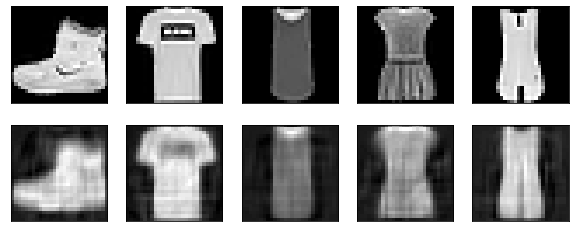

Train Epoch: 5 [0/60000 (0%)]	Loss:0.014185
Train Epoch: 5 [6400/60000 (11%)]	Loss:0.011934
Train Epoch: 5 [12800/60000 (21%)]	Loss:0.012625
Train Epoch: 5 [19200/60000 (32%)]	Loss:0.015788
Train Epoch: 5 [25600/60000 (43%)]	Loss:0.013836
Train Epoch: 5 [32000/60000 (53%)]	Loss:0.012447
Train Epoch: 5 [38400/60000 (64%)]	Loss:0.012831
Train Epoch: 5 [44800/60000 (75%)]	Loss:0.012500
Train Epoch: 5 [51200/60000 (85%)]	Loss:0.013596
Train Epoch: 5 [57600/60000 (96%)]	Loss:0.013298
[Epoch 5]


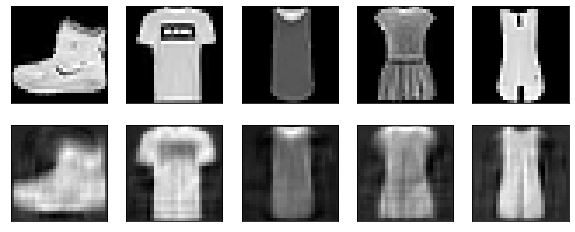

Train Epoch: 6 [0/60000 (0%)]	Loss:0.014877
Train Epoch: 6 [6400/60000 (11%)]	Loss:0.012176
Train Epoch: 6 [12800/60000 (21%)]	Loss:0.011500
Train Epoch: 6 [19200/60000 (32%)]	Loss:0.011553
Train Epoch: 6 [25600/60000 (43%)]	Loss:0.010811
Train Epoch: 6 [32000/60000 (53%)]	Loss:0.012805
Train Epoch: 6 [38400/60000 (64%)]	Loss:0.014570
Train Epoch: 6 [44800/60000 (75%)]	Loss:0.011760
Train Epoch: 6 [51200/60000 (85%)]	Loss:0.012749
Train Epoch: 6 [57600/60000 (96%)]	Loss:0.015425
[Epoch 6]


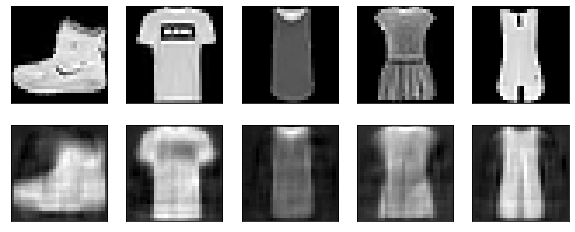

Train Epoch: 7 [0/60000 (0%)]	Loss:0.013563
Train Epoch: 7 [6400/60000 (11%)]	Loss:0.013142
Train Epoch: 7 [12800/60000 (21%)]	Loss:0.013027
Train Epoch: 7 [19200/60000 (32%)]	Loss:0.011615
Train Epoch: 7 [25600/60000 (43%)]	Loss:0.012124
Train Epoch: 7 [32000/60000 (53%)]	Loss:0.012520
Train Epoch: 7 [38400/60000 (64%)]	Loss:0.012267
Train Epoch: 7 [44800/60000 (75%)]	Loss:0.011692
Train Epoch: 7 [51200/60000 (85%)]	Loss:0.012739
Train Epoch: 7 [57600/60000 (96%)]	Loss:0.013825
[Epoch 7]


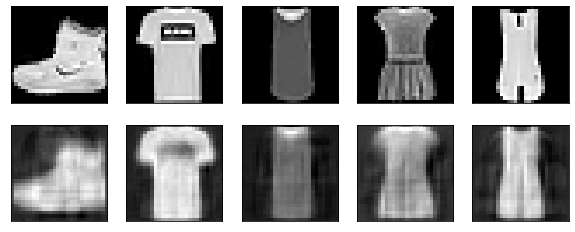

Train Epoch: 8 [0/60000 (0%)]	Loss:0.012045
Train Epoch: 8 [6400/60000 (11%)]	Loss:0.012738
Train Epoch: 8 [12800/60000 (21%)]	Loss:0.012070
Train Epoch: 8 [19200/60000 (32%)]	Loss:0.013232
Train Epoch: 8 [25600/60000 (43%)]	Loss:0.013049
Train Epoch: 8 [32000/60000 (53%)]	Loss:0.012847
Train Epoch: 8 [38400/60000 (64%)]	Loss:0.014269
Train Epoch: 8 [44800/60000 (75%)]	Loss:0.013898
Train Epoch: 8 [51200/60000 (85%)]	Loss:0.012392
Train Epoch: 8 [57600/60000 (96%)]	Loss:0.013414
[Epoch 8]


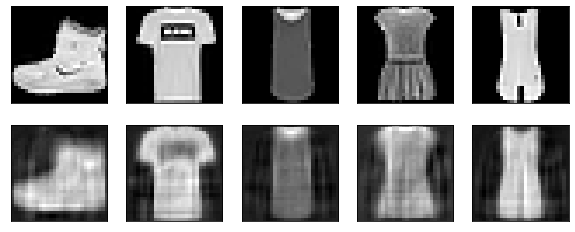

Train Epoch: 9 [0/60000 (0%)]	Loss:0.014593
Train Epoch: 9 [6400/60000 (11%)]	Loss:0.012680
Train Epoch: 9 [12800/60000 (21%)]	Loss:0.011807
Train Epoch: 9 [19200/60000 (32%)]	Loss:0.013246
Train Epoch: 9 [25600/60000 (43%)]	Loss:0.013842
Train Epoch: 9 [32000/60000 (53%)]	Loss:0.011817
Train Epoch: 9 [38400/60000 (64%)]	Loss:0.012384
Train Epoch: 9 [44800/60000 (75%)]	Loss:0.011749
Train Epoch: 9 [51200/60000 (85%)]	Loss:0.011361
Train Epoch: 9 [57600/60000 (96%)]	Loss:0.012737
[Epoch 9]


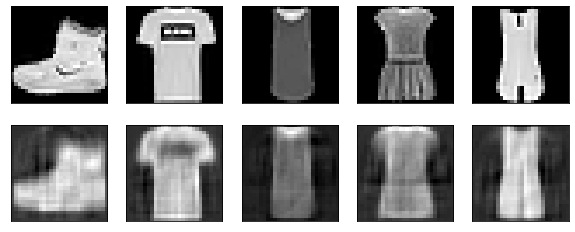

Train Epoch: 10 [0/60000 (0%)]	Loss:0.014143
Train Epoch: 10 [6400/60000 (11%)]	Loss:0.010898
Train Epoch: 10 [12800/60000 (21%)]	Loss:0.011402
Train Epoch: 10 [19200/60000 (32%)]	Loss:0.013812
Train Epoch: 10 [25600/60000 (43%)]	Loss:0.012568
Train Epoch: 10 [32000/60000 (53%)]	Loss:0.011715
Train Epoch: 10 [38400/60000 (64%)]	Loss:0.013956
Train Epoch: 10 [44800/60000 (75%)]	Loss:0.012347
Train Epoch: 10 [51200/60000 (85%)]	Loss:0.013264
Train Epoch: 10 [57600/60000 (96%)]	Loss:0.011405
[Epoch 10]


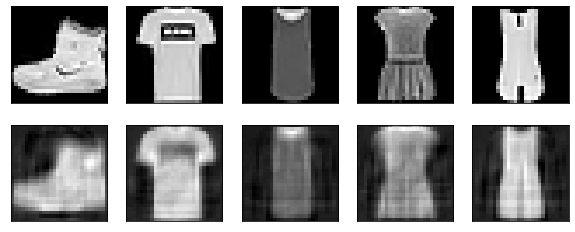

In [16]:
class AE(nn.Module):
  def __init__(self):
    super(AE, self).__init__()

    self.encoder = nn.Sequential(
        nn.Linear(28 * 28, 128),
        nn.Tanh(),
        nn.Linear(128, 64),
    )

    self.decoder = nn.Sequential(
        nn.Linear(64, 128),
        nn.Tanh(),
        nn.Linear(128, 28 * 28),
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu')

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.MSELoss()

print('model:', model)
print('device:', DEVICE)

EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer)
  test_x = view_data.to(DEVICE)
  encoded_data, decoded_data = model(test_x)
  f, a = plt.subplots(2, 5, figsize=(10, 4))
  print('[Epoch {}]'.format(epoch))
  for idx in range(5):
    img = np.reshape(view_data.data.numpy()[idx], (28, 28))
    a[0][idx].imshow(img, cmap='gray')
    a[0][idx].set_xticks(())
    a[0][idx].set_yticks(())

  for idx in range(5):
    img = np.reshape(decoded_data.to('cpu').data.numpy()[idx], (28, 28))
    a[1][idx].imshow(img, cmap='gray')
    a[1][idx].set_xticks(())
    a[1][idx].set_yticks(())
  plt.show()

In [17]:
!pip install lightgbm
!pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [19]:
import time
import lightgbm as lgb
from sklearn.metrics import accuracy_score

start = time.time()
lgb_dtrain = lgb.Dataset(data = trainset.train_data.view(-1, 28 * 28).numpy(), 
                         label = list(trainset.train_labels.numpy()))
lgb_param = {'max_depth' : 10,
             'learning_rate' : 0.001,
             'n_estimators' : 20,
             'objective' : 'multiclass',
             'num_class' : len(set(list(trainset.train_labels.numpy()))) + 1}

num_round = 10000
lgb_model = lgb.train(params = lgb_param, num_boost_round = num_round, train_set = lgb_dtrain)
lgb_model_predict = np.argmax(lgb_model.predict(trainset.train_data.view(-1, 28 * 28).numpy()), axis=1)
print('accuracy: %.2f' %(accuracy_score(list(trainset.train_labels.numpy()), lgb_model_predict) * 100), '%')
print('Time:%.2f' % (time.time() - start), 'secodes')

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


accuracy: 82.84 %
Time:87.33 secodes


In [20]:
trainset.train_labels.numpy()

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


array([9, 0, 0, ..., 3, 0, 5])

In [21]:
trainset.train_data.view(-1, 28 * 28).numpy()[0]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [25]:
train_encoded_x = trainset.train_data.view(-1, 28 * 28).to(DEVICE)
train_encoded_x = train_encoded_x.type(torch.FloatTensor)
train_encded_x = train_encoded_x.to(DEVICE)
encoded_data, decoded_data = model(train_encoded_x)
encoded_data = encoded_data.to('cpu')

start = time.time()
lgb_dtrain = lgb.Dataset(data = encoded_data.detach().numpy(), label=list(trainset.train_labels.numpy()))
lgb_param = {'max_depth' : 10,
             'learning_rate' : 0.001,
             'n_estimators' : 20,
             'objective' : 'multiclass',
             'num_class' : len(set(list(trainset.train_labels.numpy()))) + 1}
num_round = 10000
lgb_model = lgb.train(params=lgb_param, num_boost_round = num_round, train_set = lgb_dtrain)
lgb_model_predict = np.argmax(lgb_model.predict(encoded_data.detach().numpy()), axis = 1)
print('accuracy:%.2f' % (accuracy_score(list(trainset.train_labels.numpy()), lgb_model_predict) * 100), '%')
print('time: %.2f' % (time.time() - start), 'seconds')

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


accuracy:75.49 %
time: 8.92 seconds


In [26]:
encoded_data.detach().numpy()[0]

array([ 0.17297944,  0.6738843 , -0.07929088, -0.9377542 , -0.0237804 ,
       -0.3847624 , -0.33490106,  0.28322017, -0.46242645,  0.12855843,
        0.3653121 ,  0.45717528, -0.4873472 , -0.3305478 ,  0.09633915,
       -0.67985755,  3.0098412 , -0.5523685 ,  0.15497875,  0.5362212 ,
        0.21182506,  0.9201332 ,  0.41327736,  1.2120407 ,  0.09393154,
        0.12499291,  0.49045646,  0.22045203, -1.8541892 ,  1.0134392 ,
        0.00371311, -0.59095395, -0.7332046 ,  0.22885661, -0.06849322,
        0.13968398, -0.43463475,  0.45678365,  0.0513544 ,  0.3193125 ,
        0.07365046,  0.35785782,  0.2651626 ,  0.39539862, -0.48175347,
       -0.27073163, -0.55082196,  0.16278303, -0.39001128, -2.9339743 ,
        0.1890606 ,  0.8016951 , -0.32244486,  0.66535413,  0.23069353,
        1.203233  , -0.19737688, -0.09791221, -0.5881739 ,  0.5762898 ,
       -0.37287694, -0.10094967, -0.81245226,  0.28288826], dtype=float32)